In [36]:
import yfinance as yf

First I download price history for a the S&P500 index (GSPC)

In [37]:
sp500 = yf.Ticker("^GSPC")

Get all the historical data of the SP500 AND doing this gives a pandas dataframe

In [38]:
sp500 = sp500.history(period="max")

In [39]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,0.0,0.0
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,0.0,0.0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,0.0,0.0


Show the index (trading days) x axis and the closing price on the Y axis

<Axes: xlabel='Date'>

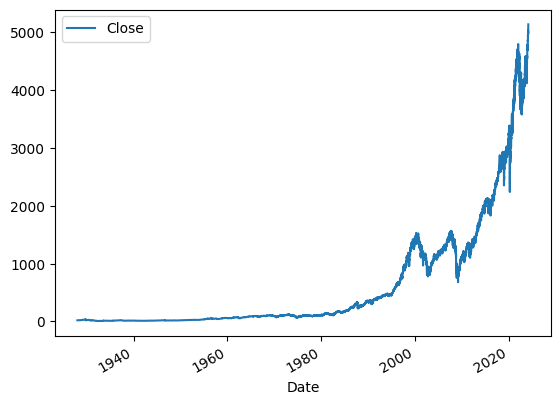

In [40]:
sp500.plot.line(y="Close", use_index=True)

In [41]:
del sp500["Dividends"]
del sp500["Stock Splits"]

Setting up the target (what we're going to be predicting on whether the price will go up or down tomorrow)

In [42]:
sp500["Tomorrow"] = sp500["Close"].shift(-1) #   Takes close column and move all the prices back one day

In [43]:
sp500 #Tomorrow's price is now the closing price of the next day

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020


Based on Tomorrow's price, I set up a target which is what we are trying to predict. Target column is created to show a 1 if price went up and 0 if it went down. 

In [44]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020,1


We don't want the market info to go back too far because of fundamental changes may have occured so go back about 20-30 years

In [45]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020,1


Begin training our first model, We will use Random Forest Classifier, because it trains a bunch of individual decision trees with randomized parameters and averages the results from those decision trees 

The parameters in our model:
1. n_estimators is the number of individual decision trees we want to train (higher it is usually the better the accuracy)
2. min_samples_split - helps protect from overfitting, the higher you set it, the less accurate the model will be, but the less it will overit
3. random_state = 1 helps us keep the same random numbers which is good if you're improving your model and want to keep current info 

In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"]) # Using predictor columns to get the target

RandomForestClassifier(min_samples_split=100, random_state=1)

Measure how accurate the model is by using precision score which tells
**"When I said the market would go up, did it actually go up?"**

In [47]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [48]:
preds

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Turn into a pandas data frame

In [49]:
import pandas as pd 
preds = pd.Series(preds, index=test.index)
preds


Date
2023-10-09 00:00:00-04:00    0
2023-10-10 00:00:00-04:00    1
2023-10-11 00:00:00-04:00    1
2023-10-12 00:00:00-04:00    1
2023-10-13 00:00:00-04:00    1
                            ..
2024-02-26 00:00:00-05:00    0
2024-02-27 00:00:00-05:00    0
2024-02-28 00:00:00-05:00    0
2024-02-29 00:00:00-05:00    0
2024-03-01 00:00:00-05:00    0
Length: 100, dtype: int64

Calculate precision score using actual target and predicted target

In [50]:
precision_score(test["Target"], preds)

0.5333333333333333

Score not the best, going to make better
Plot predictions

<Axes: xlabel='Date'>

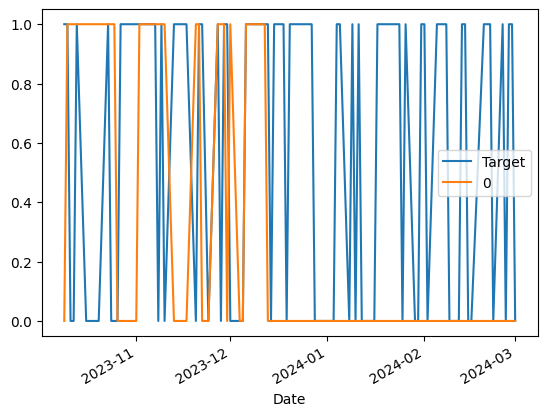

In [51]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

Plot is showing us that orange line is predictions and blue line is what actually happened 

Build a more robust testing algorithm by doing Back testing

Create a prediction function to wrap everything we just did into one function

In [52]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors]) #Generate predictions 
    preds = pd.Series(preds, index=test.index, name="Predictions") # Combine models into a series and give it a name
    combined = pd.concat([test["Target"], preds], axis=1) #Combine it all together 
    return combined

In [53]:
def backtest(data, model, predictors, start=2500, step=250): #  Take about 10 years and train it with that and the step means trading for about a year, take 10 and predict for year 11
     all_predictions = []

     for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy() # Creates training set, all of the years prior to test stet
        test = data.iloc[i:(i+step)].copy() #   Creates test set on current year
        predictions = predict(train, test, predictors, model) #Generate predictions
        all_predictions.append(predictions) #   append all predictions for the given year
        
        return pd.concat(all_predictions) # Take all predictions and concatenate into a single year

In [54]:
predictions = backtest(sp500, model, predictors) 

evaluate error of the predictions and see how many days we predicted up vs down 

In [55]:
predictions["Predictions"].value_counts()

Predictions
0    237
1     13
Name: count, dtype: int64

In [57]:
precision_score(predictions["Target"], predictions["Predictions"])

0.46153846153846156

In [58]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
0    0.516
1    0.484
Name: count, dtype: float64

From here you can add more predictors and more things to make the accuracy much better but these are just the basics.